Self-Driving Car: Behavioral Cloning
======
Behavioral Cloning project was written in Python with steering a simulated car with Keras Tensorflow as backend. In this project, I using the Udacity training data to train the self-driving vehicle.
The Udacity training data consist with 7 columns of data which is center camera, left camera, right camera, steering, throttle ,brake and speed.The simulator car have three cameras from different view points which is on left, center and right of the car front. Udacity Training data have 8036 data points in total and I split 15% data into validation set and 85% as train data. The validation data helps to ensuring the data are operates in clean, correct and useful by lower down the risk model that goes over or underfitting.


In beginning of my project, I was used the opencv to read the image, however the result was a little shaky since the simulator reading image differ with Opencv which is RGB and BGR. To optimize the performance and shortten code instead of using opencv read and convert image to BGR2RGB, I use the Scipy library which is scipy.misc.imread to read the image in [RGB](http://stackoverflow.com/questions/18714751/which-order-scipy-misc-imread-reads-the-color-images) format straight. 



## The goals / steps of this project are the following:
Strategies for Collecting Data

Now that you have driven the simulator and know how to record data, it's time to think about collecting data that will ensure a successful model. There are a few general concepts to think about that we will later discuss in more detail:

- the car should stay in the center of the road as much as possible
- if the car veers off to the side, it should recover back to center
- driving counter-clockwise can help the model generalize
- flipping the images is a quick way to augment the data
- collecting data from the second track can also help generalize the model
- we want to avoid overfitting or underfitting when training the model
- knowing when to stop collecting more data
- Use the simulator to collect data of good driving behavior
- Build, a convolution neural network in Keras that predicts steering angles from images
- Train and validate the model with a training and validation set
- Test that the model successfully drives around track one without leaving the road
- Summarize the results with a written report

This project is graded according to the criteria in the [project rubric](https://review.udacity.com/#!/rubrics/432/view).

## Project Requirements

The project requires the following libraries/software:
- [Udacity's Self Driving Car Simulator](https://github.com/udacity/self-driving-car-sim)
- Python 3.5.2
- Keras 1.2.1
- Tensorflow 1.0.0
- OpenCV 3.1.0
- Numpy 1.11.3
- SciKit-Learn 0.18

## My project includes the following files:
#### Python Code
- model.py - Used to create and train the model.
- drive.py - For driving the car in autonomous mode
- video.py - Script that recording of your vehicle driving autonomously.
- model.ipynb - The Ipython notebook with explaination of the structure to create and train the model.
#### Saved Model
- model.h5 & model.json - The saved model that containing a trained convolution neural network.
#### Saved Videos
- video.mp4 - A video recorded of your vehicle driving autonomously.


### NVIDIA's model.
[Nvidia paper](https://images.nvidia.com/content/tegra/automotive/images/2016/solutions/pdf/end-to-end-dl-using-px.pdf)

Other's Sources
[CommaAI Paper](https://arxiv.org/pdf/1608.01230.pdf)
[CommaAI Code](https://github.com/commaai/research/blob/master/train_steering_model.py)

![NVIDIA Architecture](./Nvidia_CNN.png)


### Model Architecture and Training Strategy
All computations were run on an Kali Linux 2.0 system with an Intel i7 6700k processor and an ASUS Expedition GeForce® GTX 1070 OC edition 8GB GDDR5.

![](./steering2.png)
![](./steering1.png)
This might lead to additional data manipulation in order to get the data normally distributed because if most of the training data has a steering angle of 0, all your model has to do is always predict a steering angle of 0 and it will be most of the time correct. This is actually a well-known issue in classification problems and the solution is usually to oversample the minority classes or undersample the majority class. In our case, since we have enough data points, we can limit the amount of images (undersample) where the steering angle is 0, or generate additional images (oversample) where the steering angle != 0 (e.g. adding the flipped image only where sthe steering angle != 0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
lambda_1 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_1 (Cropping2D)    (None, 62, 320, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 158, 24)       1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 77, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 37, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 35, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 33, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2112)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2112)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1164)              2459532   
_________________________________________________________________
activation_1 (Activation)    (None, 1164)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               116500    
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
activation_3 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
_________________________________________________________________
Total params: 2,712,951.0
Trainable params: 2,712,951.0
Non-trainable params: 0.0

![Training](./training.png)

Will be update in details soon.

![Center Camera](./center.png)
![Left Camera](./left.png)
![Right Cammer](./right.png)
![Before Flipped](./beforeflipped.png)
![Flipped Image](./flipped.png)
![Cropped Image](./cropped.png)

### Future Improve Recommendation
- A random training example is chosen
- The camera (left,right,center) is chosen randomly
- Random shear
- Random crop
- Random brightness
- Random skew

In [1]:
# Generic imports
import csv
import cv2
import random
import numpy as np
import pandas as pd
from scipy.misc import imread, imsave
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# File Management
FILE_CSV = './data/driving_log.csv'

ALL_DATA = pd.read_csv(FILE_CSV)

# Load data into list
center = ALL_DATA.center.tolist()
left = ALL_DATA.left.tolist()
right = ALL_DATA.right.tolist()
steering = ALL_DATA.steering.tolist()
throttle = ALL_DATA.throttle.tolist()
brake = ALL_DATA.brake.tolist()
speed = ALL_DATA.speed.tolist()

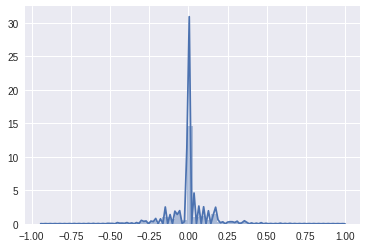

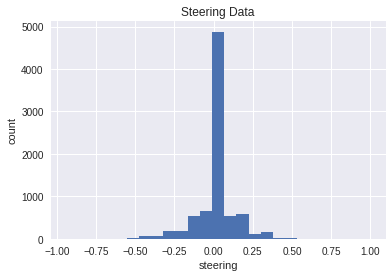

In [8]:
%matplotlib inline
sns.distplot(steering);
plt.savefig("steering1.png")
plt.show()
# draw histogram
plt.hist(steering, bins=25)
plt.title('Steering Data')
plt.ylabel('count')
plt.xlabel('steering')
plt.savefig("steering2.png")
plt.show()

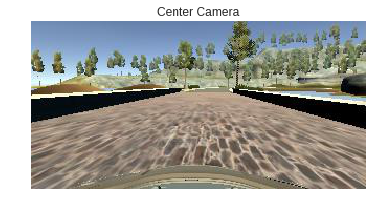

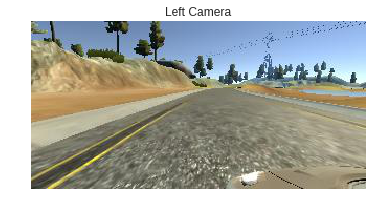

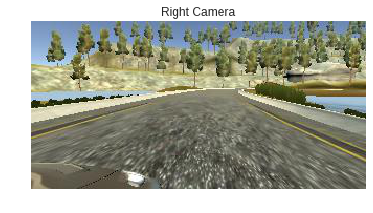

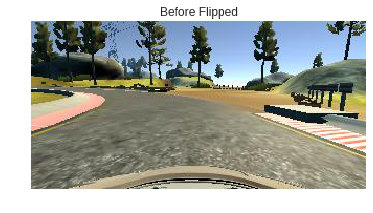

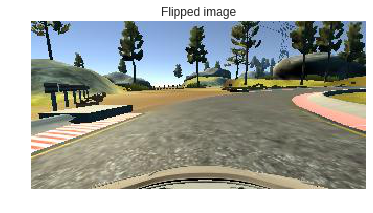

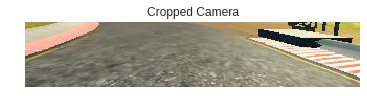

In [9]:
# display center image
img = imread('./data/IMG/center_2016_12_01_13_32_53_156.jpg')
plt.imshow(img)
plt.title('Center Camera')
plt.axis('off')
plt.savefig("center.png")
plt.show()

# display left image
img = imread('./data/IMG/left_2016_12_01_13_39_20_338.jpg')
plt.imshow(img)
plt.title('Left Camera')
plt.axis('off')
plt.savefig("left.png")
plt.show()

# display right image
img = imread('./data/IMG/right_2016_12_01_13_37_11_521.jpg')
plt.imshow(img)
plt.title('Right Camera')
plt.axis('off')
plt.savefig("right.png")
plt.show()

# display image
img = imread('./data/IMG/center_2016_12_01_13_31_13_482.jpg')
plt.imshow(img)
plt.title('Before Flipped')
plt.axis('off')
plt.savefig("beforeflipped.png")
plt.show()

# display flipped image
flipped_img = np.fliplr(img)
plt.imshow(flipped_img)
plt.title('Flipped image')
plt.axis('off')
plt.savefig("flipped.png")
plt.show()

#Cropped top 74 and bottom 24
plt.imshow(img[:][73:135])
plt.title('Cropped Camera')
plt.axis('off')
plt.savefig("cropped.png")
plt.show()
